In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib

import matplotlib.ticker as tick
import seaborn as sns   
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure

# ThisYear = date.today().timetuple()[0]

import os
from datetime import timedelta, date, datetime
import io
import zipfile
import requests
import itertools
import pprint as pp


## suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

# 1. Gathering Data


Load in your dataset.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
print(df.shape)

(183412, 16)


In [5]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# 2. Assessing Data

In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [14]:
df.duplicated().value_counts()

False    183412
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Observations: 

    1- Data has rows 29225 and 16 columns
    2- Trip duration is in sec
    3- Start and End time are not in datetime datetype 
    4- There's many missing data 
    5- No duplicates in the dataset 
    
   

# Cleaning Data 

In [16]:
# Define: Copy Data


#code 
df_clean = df.copy()

In [17]:
# Test 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [18]:
# Define : Changing The Data Type

#Code: 

df_clean.start_time = df_clean.start_time.astype('datetime64')

df_clean.end_time = df_clean.end_time.astype('datetime64')

df_clean.start_station_id = df_clean.start_station_id.astype('str')

df_clean.end_station_id = df_clean.end_station_id.astype('str')

df_clean.bike_id = df_clean.bike_id.astype('str')

df_clean.member_gender  = df_clean.member_gender.astype('category')



In [19]:
#test 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [20]:
# Define: drop duplicated 


# Code: 

df_clean = df_clean.drop_duplicates()

In [21]:
#test 

sum(df_clean.duplicated())

0

In [22]:
#Define: Duration time change it to seconds 

#Code: 

import datetime as dt

df_clean['duration_minute'] = df_clean['duration_sec']/60

In [23]:
#test

df_clean['duration_minute']

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_minute, Length: 183412, dtype: float64

In [24]:
#change memeber year to birth age

ThisYear = date.today().timetuple()[0]

df_clean['memeber_old'] = ThisYear - df_clean['member_birth_year']

In [25]:
df_clean['memeber_old'].value_counts()

33.0     10236
28.0      9325
32.0      8972
31.0      8658
30.0      8498
         ...  
143.0        1
93.0         1
91.0         1
111.0        1
94.0         1
Name: memeber_old, Length: 75, dtype: int64

In [26]:
#test

df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,memeber_old
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,37.0


In [27]:
# #Define: Drop Columns is not important 

# df_copyD = ['member_birth_year']

# df_clean = df_clean.drop(columns = df_copyD , axis = 1)

In [28]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old']

In [29]:
# Define:
# Creating A year table 
# A month Table 
# A day Table using start time table

#Code: 
# A Year 
df_clean['year'] = df_clean['start_time'].dt.strftime('%Y')
# A Month 
df_clean['month'] = df_clean['start_time'].dt.month.astype(int)
# A day 
df_clean['day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['week_day'] = df_clean['start_time'].dt.day_name() 
# A date 
df_clean['date'] = df_clean['start_time'].dt.date
# A hour 
df_clean['hour'] = df_clean['start_time'].dt.hour


In [30]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old',
 'year',
 'month',
 'day',
 'week_day',
 'date',
 'hour']

In [31]:
df_clean.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_minute,memeber_old,year,month,day,week_day,date,hour
90955,287,2019-02-16 10:56:37.998,2019-02-16 11:01:25.118,276.0,Julian St at The Alameda,37.332233,-121.912517,35.0,Cahill Park,37.329119,...,Male,Yes,4.783333,27.0,2019,2,Sat,Saturday,2019-02-16,10
56186,698,2019-02-21 09:10:05.290,2019-02-21 09:21:43.686,368.0,Myrtle St at Polk St,37.785434,-122.419622,90.0,Townsend St at 7th St,37.771058,...,Male,No,11.633333,29.0,2019,2,Thu,Thursday,2019-02-21,9


## 3. Storing data

In [32]:
df_clean.to_csv('ford_gobike.csv', index =False , header = True)

## II. Data Exploration

#### Load the data 


In [33]:
d_type = {'user_type': 'category'}  
p_dates = ['start_time', 'end_time']         # Set date variable as a datetime datatype 

# import the csv respecting datatypes
df =pd.read_csv('ford_gobike.csv', dtype=d_type, parse_dates=p_dates)   

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Univariate Exploration

In this section, the distributions of individual variables will be investigated.

In [35]:
c = sns.color_palette()[0]

##### How Many Types the application has and how much each of them works?

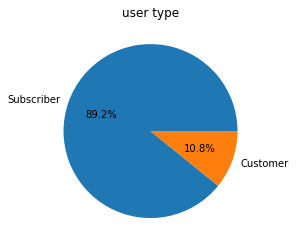

In [36]:
user = df["user_type"].value_counts()
plt.pie(data=df,x=user,labels=user.index,autopct='%1.1f%%');
plt.title("user type");

 89.2% Percent of user types are Subscriber as it shows above , people like to subscribe in trips 

#### Since we knew the majorty of the users are subscriber , so what are the majority of genders in user type?


Text(0.5, 1.0, 'The Gender of user')

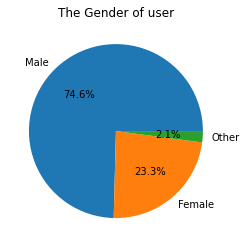

In [37]:
gender_user = df['member_gender'].value_counts()

plt.pie(data = df , x= gender_user , labels =gender_user.index , autopct = '%1.1f%%');

plt.title('The Gender of user')

As showen Above in the graph the most of the members are male members 

### When are the most peak days? 

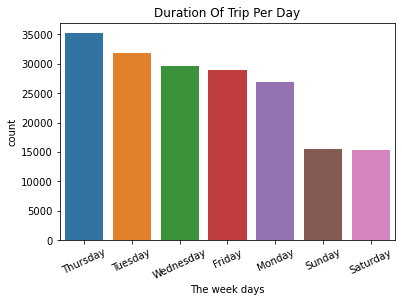

In [38]:
sns.countplot(data = df , x = 'week_day', order=df.week_day.value_counts().index)
plt.title('Duration Of Trip Per Day')
plt.xlabel('The week days');
plt.xticks(rotation = 25);

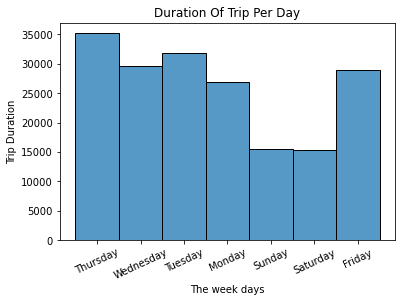

In [39]:
data = df['week_day']
sns.histplot(data , bins = 20)
plt.title('Duration Of Trip Per Day')
plt.xlabel('The week days');
plt.ylabel('Trip Duration');
plt.xticks(rotation = 25);

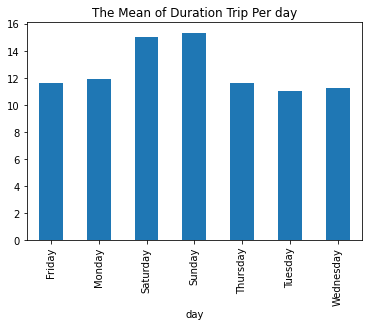

In [40]:
df[['week_day' , 'duration_minute']].groupby('week_day').mean().plot(kind = 'bar' , legend = None)
plt.title('The Mean of Duration Trip Per day')
plt.xlabel('day');


As shown above the peakest day is Sunday and Saturday , basically the Weekend 

### Since we figure it out the days that has the most peak , so during the day whether the users like it on the morning time or the evining or during the night? 

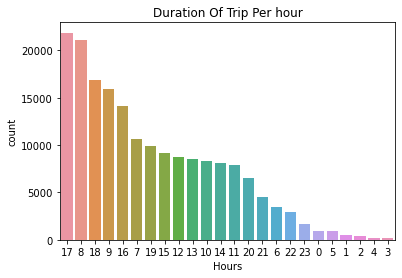

In [41]:
sns.countplot(data = df , x = 'hour', order=df.hour.value_counts().index)
plt.title('Duration Of Trip Per hour')
plt.xlabel('Hours');

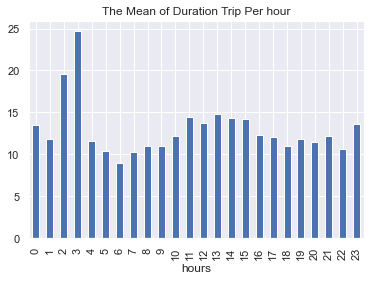

In [77]:
df[['hour' , 'duration_minute']].groupby('hour').mean().plot(kind = 'bar' , legend = None)
plt.title('The Mean of Duration Trip Per hour')
plt.xlabel('hours');

As shown above the most peak hour of user that like to have their the trips between 8 AM and 5 PM 

### Eariler we knew that the majority of users are male so now we need to know the age between each ages and between each gender

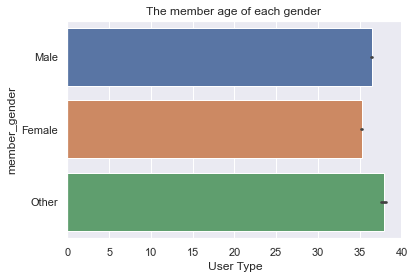

In [87]:
sns.barplot(data = df , x = 'memeber_old' , y = 'member_gender' , order = df.member_gender.value_counts().index)
plt.title('The member age of each gender ')
plt.xticks(rotation = 1);
plt.xlabel('User Type');


As we found out the majority are between 15 and 40 years 

In [44]:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old',
 'year',
 'month',
 'day',
 'week_day',
 'date',
 'hour']

In [88]:
df['duration_minute'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minute, dtype: float64

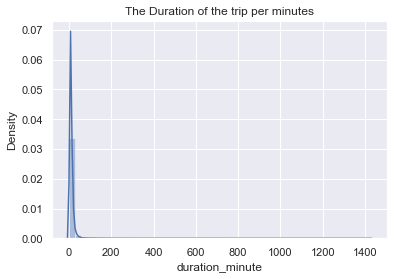

In [89]:
sns.distplot(df['duration_minute']);
plt.title('The Duration of the trip per minutes');

In [90]:
#skewness and kurtosis
print("Skewness: %f" % df['duration_minute'].skew())
print("Kurtosis: %f" % df['duration_minute'].kurt())

Skewness: 26.839101
Kurtosis: 921.856583


### Bivariate Exploration
In this section some bivariate exploration will be done, the trip duration needs an exponential transformation to get an significant graphs

The exponential transformation is already done 'exp_trans', an yticks settings are neeeded

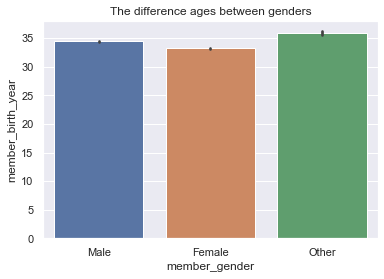

In [97]:
sns.barplot(x = 'member_gender', y = 2019 -  df['member_birth_year'] ,  data = df , order = df.member_gender.value_counts().index)
plt.title('The difference ages between genders');
plt.show();

Most of the users are middle ages 

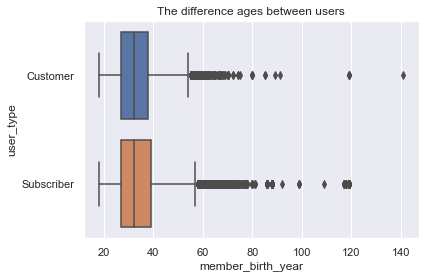

In [98]:
sns.boxplot(x =  2019 -  df['member_birth_year'] , y='user_type' , data = df)
plt.title('The difference ages between users');

plt.show();

The user type in subscriber are between 35 and 40 years old

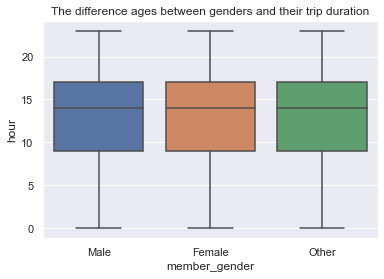

In [99]:
sns.boxplot(x = 'member_gender' , y= 'hour' , data = df , order = df.member_gender.value_counts().index)
plt.title('The difference ages between genders and their trip duration');

plt.show();

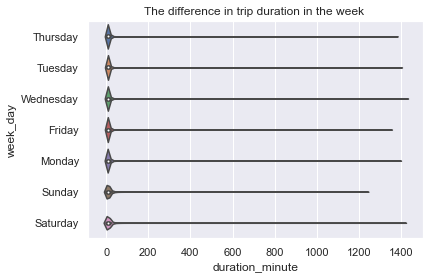

In [100]:
sns.violinplot( x = "duration_minute" , y = "week_day" , data = df , size = 6 , order = df.week_day.value_counts().index)

plt.title('The difference in trip duration in the week ');


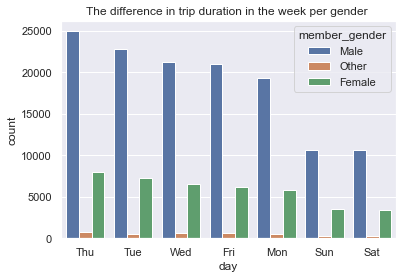

In [113]:
sns.countplot(data = df , x= 'day' , hue = 'member_gender' , order = df.day.value_counts().index)

plt.title('The difference in trip duration in the week per gender ');


Well, I believe people get excited during the weekend than the week days , with their busy schdule is hard to keep a long trip

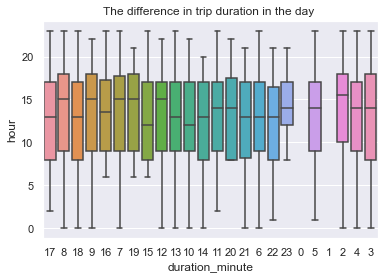

In [101]:
sns.boxplot( x = "duration_minute" , y = "hour" , data = df , order = df.hour.value_counts().index)

plt.title('The difference in trip duration in the day ');


Since users most likly to have their trips during the weekend , as it shown above they like at 8 am and 5 pm 

### Multivariate Exploration
Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

In [55]:
# df[df['hour'] < 25].plot.scatter(x='hour', y='duration_minute')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


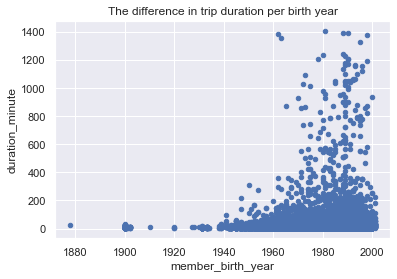

In [104]:
#scatter plot totalbsmtsf/saleprice
var = 'member_birth_year'
data = pd.concat([df['duration_minute'], df[var]], axis=1)
data.plot.scatter(x=var, y='duration_minute')
plt.title('The difference in trip duration per birth year');


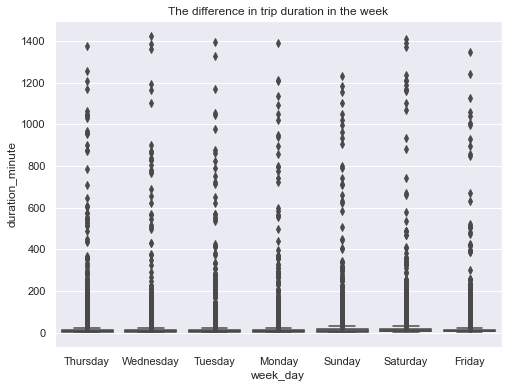

In [105]:
#box plot overallqual/saleprice
var = 'week_day'
data = pd.concat([df['duration_minute'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="duration_minute", data=data)
plt.title('The difference in trip duration in the week');



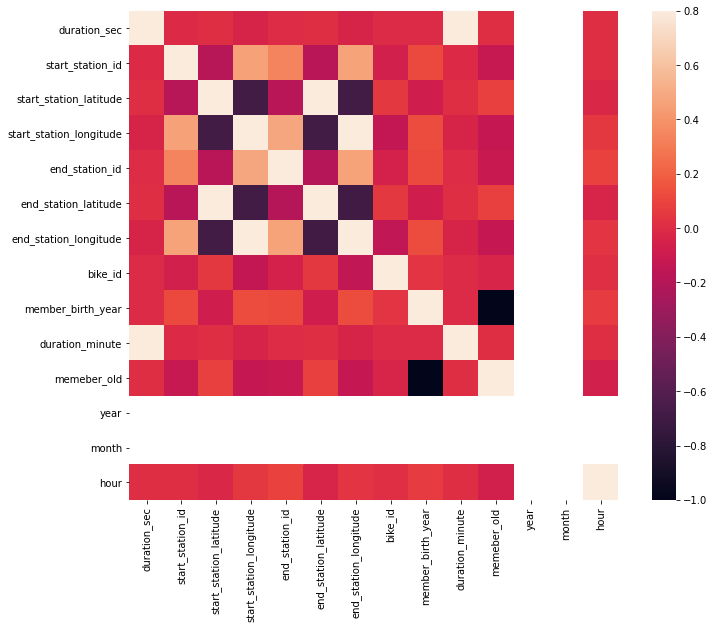

In [58]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The connection cofficients show there may be relationships between's the accompanying sets of factors

          (start_station_id, end_station_id),
             (start_station_latitude, 
              start_station_longitude),
    (end_station_latitude, end_station_longitude). 

Notwithstanding, there are no solid confirmations to help these. So these might happen just coincidentally.

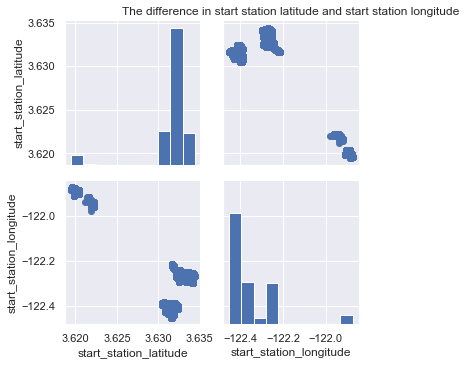

In [106]:
g = sns.PairGrid(data = df, vars = ['start_station_latitude', 'start_station_longitude'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title('The difference in start station latitude and start station longitude');


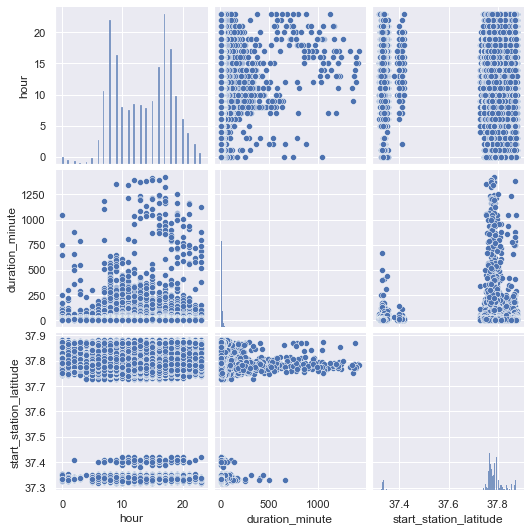

In [60]:
#scatterplot
sns.set()
cols = ['hour', 'duration_minute','start_station_latitude']
sns.pairplot(df[cols])
plt.show();

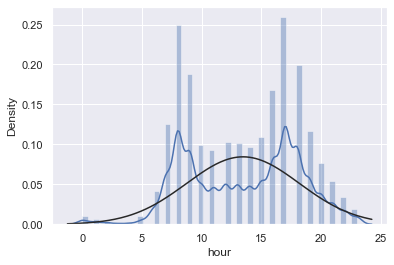

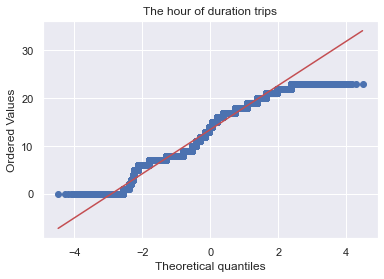

In [117]:
#histogram and normal probability plot
from scipy import stats

from scipy.stats import norm

sns.distplot(df['hour'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['hour'], plot=plt)

plt.title('The hour of duration trips');

In [108]:
df['start_station_latitude'] = np.log(df['start_station_latitude'])

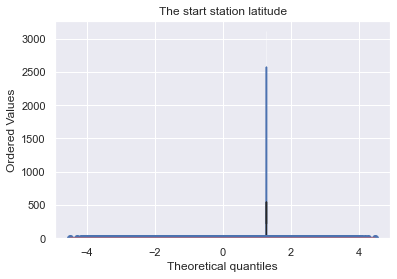

In [119]:
 #transformed histogram and normal probability plot
sns.distplot(df['start_station_latitude'], fit=norm);
fig = plt.figure('')
res = stats.probplot(df['start_station_latitude'], plot=plt)
plt.title('The start station latitude');


<AxesSubplot:>

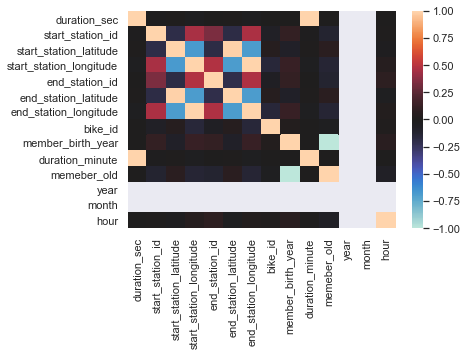

In [111]:
sns.heatmap(df.corr(),fmt = '.2f', center = 0)


This part upgraded the past subjects of information investigation through various visuals and including more factors to contrast with different factors. Plotting a heatmap of interest of the bicycles for the duration of the day consistently shed another light on the time put together conversation with respect to when and what time every client bunch utilizes the bicycle sharing framework and the clients and females invest more energy that the others

### Interesting Observation

Bicycle rides on Saturday and Sunday have longer terms contrasted with bicycle rides on different work days. 

Bicycle rides start between 5:00 AM to 6:00 PM have the longest mean spans contrasted with other time periods. 

Female bikers bicycle longer on normal contrasted with male bikers. 

Bikers with user_type 'Client' bicycles longer on normal contrasted with bikers with user_type 'Endorser'. 

The mean time of bikers on Tuesday and Wednesday are higher than the mean period of bikers on different days.

Bicycle rides on Saturday and Sunday have longer terms contrasted with bicycle rides on different non-weekend days. 

Bicycle rides start between 5:00 AM to 6:00 PM have the longest mean terms contrasted with other time spans. 

Female bikers bicycle longer on normal contrasted with male bikers. 

Bikers with user_type 'Client' bicycles longer on normal contrasted with bikers with user_type 'Endorser'. 

There are more bicycle rides with lengths near mean term time (10 minutes) on the non-weekend days contrasted with the bicycle rides on the ends of the week. 

The mean bicycle term for female biker is longer than the mean length of the male bikers. 

The mean bicycle term for 'Client' biker is longer than the mean length of the 'Supporter' bikers.